In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
import pandas as pd
from FixturesOdds import FixturesOdds
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import FootballClf

In [4]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [16]:
X=fix_pred.X()
Y=fix_pred.y()

In [13]:
from sklearn.preprocessing import minmax_scale

In [17]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [20]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=6, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
model=baseline_model()

In [22]:
history = model.fit(X,dummy_y, epochs=50, batch_size=1, verbose=0)

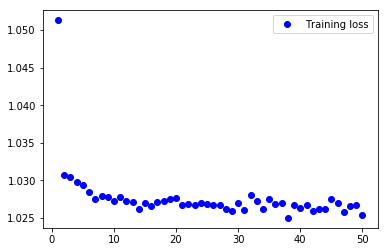

In [27]:
loss=history.history['loss']
epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.legend()

plt.show()

In [33]:
x_test=X[:4]
predictions = model.predict(x_test)

In [34]:
predictions

array([[0.2925541 , 0.37817192, 0.329274  ],
       [0.2989008 , 0.31740397, 0.38369524],
       [0.287129  , 0.40585178, 0.30701926],
       [0.30054542, 0.2893809 , 0.41007367]], dtype=float32)

In [35]:
predictions[0].shape

(3,)

In [36]:
dummy_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)